# Relatório de Análise VIII

## Identificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14, 6))

In [2]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

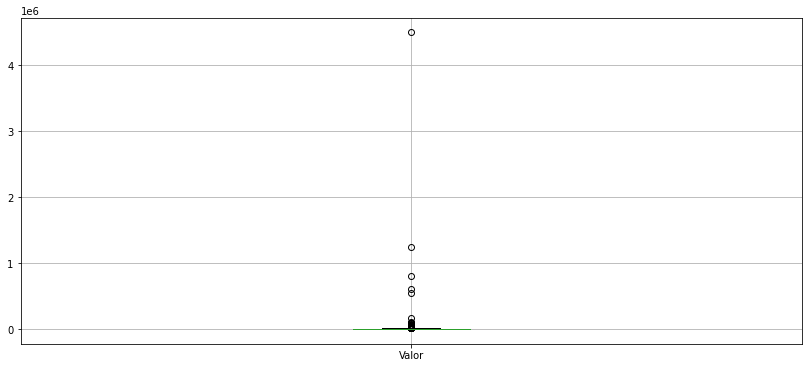

In [4]:
dados.boxplot(['Valor']);

In [5]:
dados[dados['Valor'] >= 500000]



,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,tipo_agregado
7629,Apartamento,Barra da Tijuca,1,1,0,65,600000.0,980.0,120.0,9230.77,Apartamento
10636,Casa de Condomínio,Freguesia (Jacarepaguá),4,2,3,163,800000.0,900.0,0.0,4907.98,Casa
12661,Apartamento,Freguesia (Jacarepaguá),2,2,1,150,550000.0,850.0,150.0,3666.67,Apartamento
13846,Apartamento,Recreio dos Bandeirantes,3,2,1,167,1250000.0,1186.0,320.0,7485.03,Apartamento
15520,Apartamento,Botafogo,4,1,1,300,4500000.0,1100.0,0.0,15000.00,Apartamento


In [7]:
valor = dados['Valor']

In [8]:
q1 = valor.quantile(.25)
q3 = valor.quantile(.75)
iiq = q3 - q1
limite_inferior = q1 - 1.5 * iiq
limite_superior = q3 + 1.5 * iiq

In [9]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

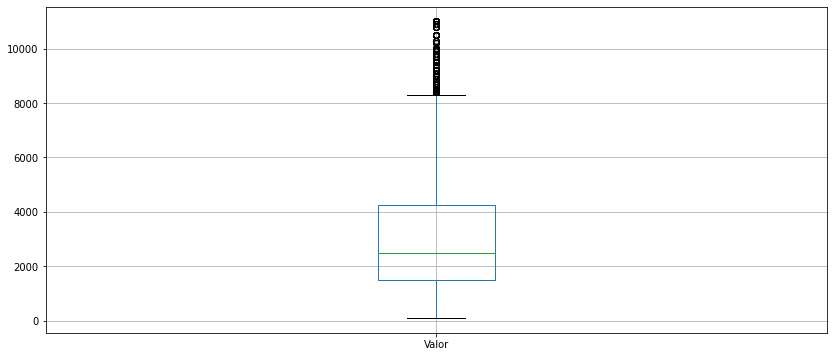

In [11]:
dados_new.boxplot(['Valor']);

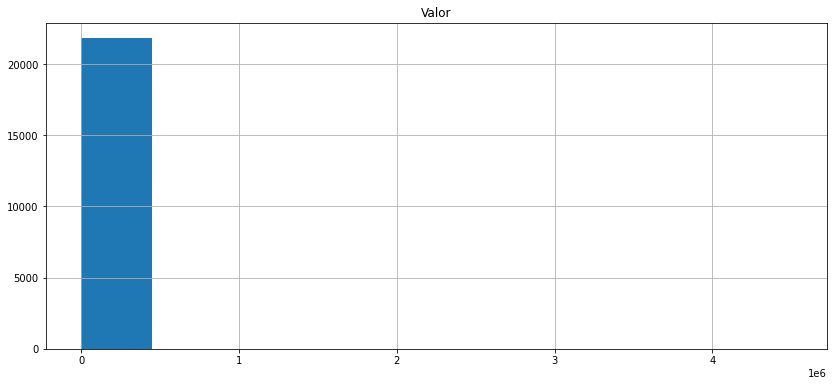

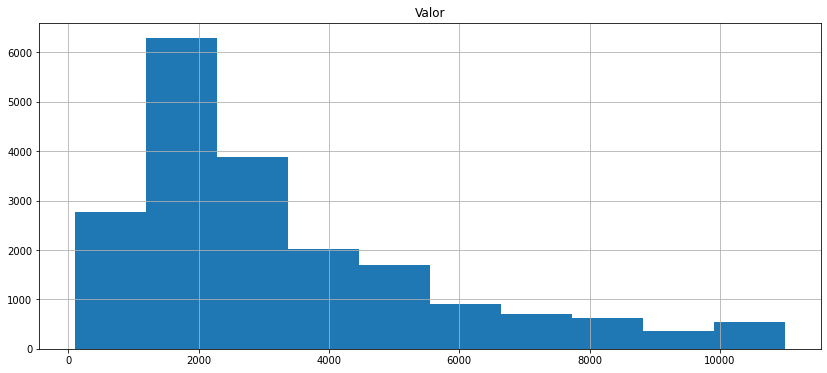

In [12]:
dados.hist(['Valor']);
dados_new.hist(['Valor']);


<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

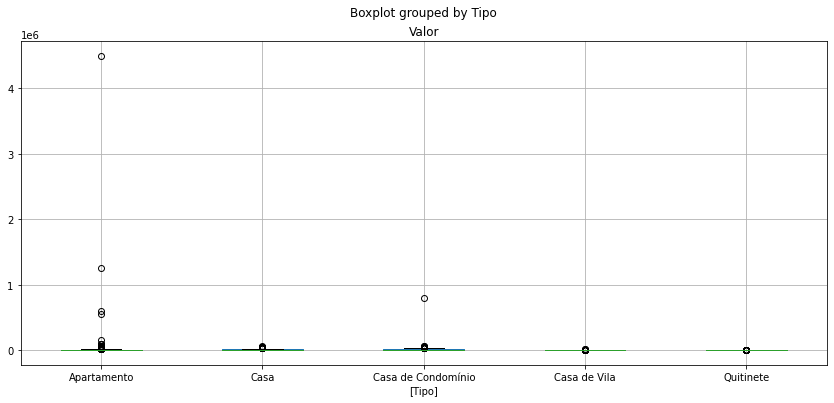

In [23]:
dados.boxplot(['Valor'], by=['Tipo'])

In [25]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [26]:
grupo_tipo.groups

{'Apartamento': [2, 3, 4, 7, 8, 9, 11, 13, 14, 15, 17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 55, 56, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 72, 73, 74, 75, 76, 77, 79, 80, 82, 83, 84, 85, 87, 88, 89, 90, 91, 92, 93, 94, 95, 97, 98, 99, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, ...], 'Casa': [1, 22, 54, 57, 96, 100, 144, 160, 180, 238, 250, 253, 264, 286, 310, 316, 334, 339, 357, 378, 385, 399, 424, 434, 474, 475, 481, 511, 542, 543, 567, 571, 572, 618, 621, 630, 635, 636, 660, 676, 700, 721, 724, 760, 771, 780, 856, 873, 937, 982, 1029, 1036, 1118, 1123, 1125, 1157, 1178, 1249, 1256, 1316, 1335, 1350, 1371, 1412, 1426, 1430, 1440, 1445, 1472, 1475, 1488, 1586, 1604, 1656, 1662, 1666, 1671, 1684, 1709, 1717, 1762, 1810, 1835, 1875, 1905, 1933, 1942, 1960, 2019, 2039, 2056, 2075, 2101, 2107, 2108, 2133, 2170, 2201, 2204, 2211, ...], 'Casa 

In [27]:
q1 = grupo_tipo.quantile(.25)
q3 = grupo_tipo.quantile(.75)
iiq = (q3 - q1).round(2)
limite_inferior = (q1 - 1.5 * iiq).round(2)
limite_superior = (q3 + 1.5 * iiq).round(2)

In [29]:
q1['Apartamento']

1700.0

In [32]:
dados_new = pd.DataFrame()

for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

In [33]:
dados_new.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_m2,tipo_agregado
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
7,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
8,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

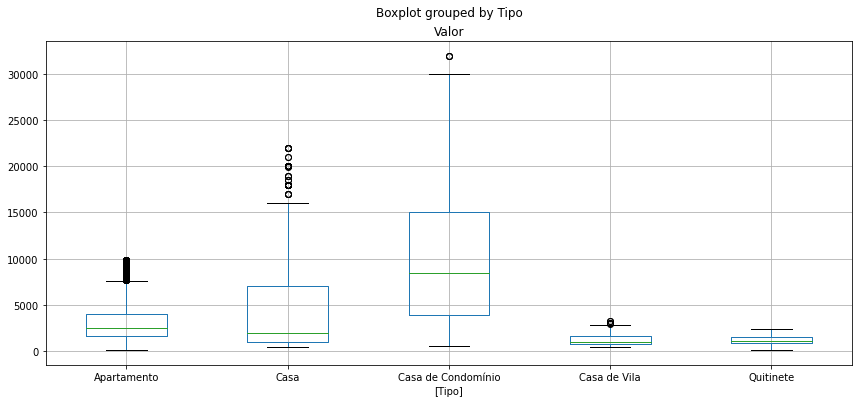

In [35]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [36]:
dados_new.to_csv('dados/aluguel_residencial_sem_outliers.csv', sep = ';', index=False)

# Exercício

In [14]:
amostra = pd.read_csv('dados/aluguel_amostra.csv', sep=';')
amostra.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Recreio dos Bandeirantes,3,2,1,320,3200.0,1319.0,0.0,10.00,Apartamento
1,Apartamento,Maracanã,2,0,0,59,800.0,725.0,47.0,13.56,Apartamento
2,Apartamento,Leblon,3,2,1,147,7500.0,1000.0,381.0,51.02,Apartamento
3,Apartamento,São Conrado,3,3,3,270,14999.0,2800.0,1200.0,55.55,Apartamento
4,Apartamento,Tijuca,2,1,0,65,1200.0,640.0,97.0,18.46,Apartamento


In [15]:
valor_m2 = amostra['Valor m2']

In [21]:
q1 = valor_m2.quantile(.25)
q3 = valor_m2.quantile(.75)
iiq = (q3 - q1).round(2)
limite_inferior = (q1 - 1.5 * iiq).round(2)
limite_superior = (q3 + 1.5 * iiq).round(2)

In [22]:
print(f'q1: {q1}\nq3: {q3}\niiq: {iiq}\nlimite_inferior: {limite_inferior}\nlimite_superior: {limite_superior}')

q1: 21.25
q3: 42.31
iiq: 21.06
limite_inferior: -10.34
limite_superior: 73.9
